### Import the Toolkit <br>

In [2]:
# import the necessary libraries you need for your analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

# warnings supression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load and Inspect the Data<br>

In [3]:
# read in csv file and display first 5 rows of datset
df = pd.read_excel("data/MuesliProject_raw_data.xlsx")


In [4]:
# read in csv file and display first 5 rows of datset
df2 = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='Campaign Data')

In [5]:
#change the column description - underscore instead of space and all str lower
df6 = df2.copy()
cols = df6.columns.tolist()
cols = [col.replace(' ','_').lower()for col in cols]

df6.columns = cols
df2 = df6

In [6]:
df2

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly
...,...,...,...
328,CA-2020-129707,2020-05-08,Larry Hughes
329,CA-2020-125381,2020-05-08,Speros Goranitis
330,CA-2020-141733,2020-05-15,Rick Wilson
331,US-2020-104451,2020-05-15,Michelle Moray


In [7]:
df3 = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='Order Process Data')

In [8]:
df3

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604.0,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605.0,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
...,...,...,...,...,...
5894,908.0,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5895,909.0,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,1297.0,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing
5897,1298.0,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [9]:
#change the column description - underscore instead of space and all str lower
df7 = df3.copy()
cols = df7.columns.tolist()
cols = [col.replace(' ','_').lower()for col in cols]

df7.columns = cols
df3 = df7

In [10]:
df3.drop('row_id',axis=1,inplace=True)

In [11]:
df4 = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='InternData Study')

In [12]:
#change the column description - underscore instead of space and all str lower
df8 = df4.copy()
cols = df8.columns.tolist()
cols = [col.replace(' ','_').lower()for col in cols]

df8.columns = cols
df4 = df8

In [13]:
df4

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06
...,...,...,...
285,CA-2020-105333,2020-12-04,2020-12-07
286,CA-2020-105333,2020-12-04,2020-12-07
287,US-2020-110576,2020-12-04,2020-12-07
288,CA-2020-119305,2020-12-04,2020-12-07


In [14]:
df.shape

(9995, 19)

In [15]:
df.nunique(axis=0) #returns the number of unique values for each variable.

Unnamed: 0     9995
Unnamed: 1     5010
Unnamed: 2     1237
Unnamed: 3        4
Unnamed: 4      794
Unnamed: 5      794
Unnamed: 6        4
Unnamed: 7        2
Unnamed: 8      532
Unnamed: 9       50
Unnamed: 10     631
Unnamed: 11       5
Unnamed: 12       4
Unnamed: 13      18
Unnamed: 14    1863
Unnamed: 15    6145
Unnamed: 16      15
Unnamed: 17      13
Unnamed: 18    7546
dtype: int64

In [16]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
1,27.0,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
2,45.0,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714
3,48.0,CA-2019-169194,2019-06-20 00:00:00,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.0,3.0,0.0,4.95
4,60.0,CA-2019-111682,2019-06-17 00:00:00,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.0,2.0,0.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9894.0,US-2019-115441,2019-07-25 00:00:00,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,53209.0,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.56,4.0,0.0,96.8544
9991,9908.0,US-2018-129007,2018-09-13 00:00:00,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,92804.0,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.72,3.0,0.2,71.772
9992,9913.0,CA-2018-132388,2018-10-10 00:00:00,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,93101.0,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3.0,0.2,-54.3204
9993,9920.0,CA-2019-149272,2019-03-15 00:00:00,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,77803.0,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.43,5.0,0.3,-143.431


In [17]:
#column cleaning
headers = df.iloc[0]
df.rename(columns=headers, inplace=True)
df.drop(df.index[0], inplace=True)

In [18]:
#change the column description - underscore instead of space and all str lower
df0 = df.copy()
cols = df0.columns.tolist()
cols = [col.replace(' ','_').lower()for col in cols]

df0.columns = cols
df = df0


In [19]:
df.nunique(axis=0) #returns the number of unique values for each variable.

index             9994
order_id          5009
order_date        1236
ship_mode            3
customer_id        793
customer_name      793
origin_channel       3
country/region       1
city               531
state               49
postal_code        630
region               4
category             3
sub-category        17
product_id        1862
sales             6144
quantity            14
discount            12
profit            7545
dtype: int64

In [20]:
df.drop(['index','country/region'], axis=1, inplace=True)

In [21]:
df = df.reset_index(col_level=0)

In [22]:
df.drop('index',axis=1,inplace=True)

In [23]:
df

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714
2,CA-2019-169194,2019-06-20 00:00:00,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.0,3.0,0.0,4.95
3,CA-2019-111682,2019-06-17 00:00:00,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.0,2.0,0.0,3.3
4,CA-2018-135545,2018-11-24 00:00:00,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2.0,0.0,6.1512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,2019-07-25 00:00:00,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209.0,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.56,4.0,0.0,96.8544
9990,US-2018-129007,2018-09-13 00:00:00,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804.0,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.72,3.0,0.2,71.772
9991,CA-2018-132388,2018-10-10 00:00:00,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101.0,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3.0,0.2,-54.3204
9992,CA-2019-149272,2019-03-15 00:00:00,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803.0,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.43,5.0,0.3,-143.431


In [24]:
df["order_date"] = pd.to_datetime(df["order_date"], format='%d.%m.%y')

In [25]:
df.sort_values(by='order_date')

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
3225,CA-2017-103800,2017-01-03,Standard Class,DP-13000,Darren Powers,Email,Houston,Texas,77095.0,Central,Power Muesli,Nuts and more,OFF-PA-10000174,16.448,2.0,0.2,5.5512
4785,CA-2017-112326,2017-01-04,Standard Class,PO-19195,Phillina Ober,Facebook,Naperville,Illinois,60540.0,Central,Power Muesli,Steel Cut,OFF-ST-10002743,272.736,3.0,0.2,-64.7748
1789,CA-2017-112326,2017-01-04,Standard Class,PO-19195,Phillina Ober,Facebook,Naperville,Illinois,60540.0,Central,Power Muesli,No Taste All Power,OFF-LA-10003223,11.784,3.0,0.2,4.2717
5655,CA-2017-112326,2017-01-04,Standard Class,PO-19195,Phillina Ober,Facebook,Naperville,Illinois,60540.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10004094,3.54,2.0,0.8,-5.487
7229,CA-2017-141817,2017-01-05,Standard Class,MB-18085,Mick Brown,Email,Philadelphia,Pennsylvania,19143.0,East,Power Muesli,Super Mega Protein,OFF-AR-10003478,19.536,3.0,0.2,4.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,CA-2020-126221,2020-12-30,Standard Class,CC-12430,Chuck Clark,Facebook,Columbus,Indiana,47201.0,Central,Power Muesli,Mega Protein,OFF-AP-10002457,209.3,2.0,0.0,56.511
5750,CA-2020-115427,2020-12-30,Standard Class,EB-13975,Erica Bern,Sales,Fairfield,California,94533.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10004632,20.72,2.0,0.2,6.475
8211,CA-2020-143259,2020-12-30,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,New York,10009.0,East,Toasted Muesli,With Fruit,FUR-BO-10003441,323.136,4.0,0.2,12.1176
3577,CA-2020-143259,2020-12-30,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,New York,10009.0,East,Special Projects Muesil,Only Oats,TEC-PH-10004774,90.93,7.0,0.0,2.7279


In [26]:
df.apply(lambda x: sum(x.isnull()),axis=0)

order_id           0
order_date         0
ship_mode          0
customer_id        0
customer_name      0
origin_channel     0
city               0
state              0
postal_code       11
region             0
category           0
sub-category       0
product_id         0
sales              0
quantity           0
discount           0
profit             0
dtype: int64

In [27]:
df[df.isnull().any(axis=1)]

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
173,CA-2020-104066,2020-12-05,Standard Class,QJ-19255,Quincy Jones,Sales,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7.0,0.0,67.6599
710,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10002926,99.98,2.0,0.0,42.9914
1732,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Mega Protein,OFF-AP-10000828,542.94,3.0,0.0,152.0232
3408,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10000157,79.92,4.0,0.0,37.5624
3409,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10001970,12.28,1.0,0.0,5.7716
4279,US-2019-150140,2019-04-06,Standard Class,VM-21685,Valerie Mitchum,Facebook,Burlington,Vermont,NaN,East,Special Projects Muesil,Only Oats,TEC-PH-10002555,1294.75,5.0,0.0,336.635
4694,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Power Clean Fibre Boost,OFF-EN-10001509,2.04,1.0,0.0,0.9588
5490,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,NaN,East,Power Muesli,Steel Cut,OFF-ST-10001526,1564.29,13.0,0.0,406.7154
7802,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,NaN,East,Power Muesli,Super Mega Protein,OFF-AR-10003477,8.04,6.0,0.0,2.7336
8415,CA-2018-117086,2018-11-08,Standard Class,QJ-19255,Quincy Jones,Sales,Burlington,Vermont,NaN,East,Toasted Muesli,With Fruit,FUR-BO-10004834,4404.9,5.0,0.0,1013.127


We believe that all city Burlington or State vermont had a NaN postal_code

In [28]:
df.query("city == 'Burlington'")

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
173,CA-2020-104066,2020-12-05,Standard Class,QJ-19255,Quincy Jones,Sales,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7.0,0.0,67.6599
379,CA-2020-142090,2020-11-30,Standard Class,SC-20380,Shahid Collister,Email,Burlington,North Carolina,27217.0,South,Special Projects Muesil,Gluten Free,TEC-AC-10002001,383.976,3.0,0.2,81.5949
710,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10002926,99.98,2.0,0.0,42.9914
974,US-2020-168116,2020-11-04,First Class,GT-14635,Grant Thornton,Sales,Burlington,North Carolina,27217.0,South,Special Projects Muesil,Low Sugar,TEC-MA-10004125,7999.98,4.0,0.5,-3839.9904
1329,US-2020-168116,2020-11-04,First Class,GT-14635,Grant Thornton,Sales,Burlington,North Carolina,27217.0,South,Power Muesli,Mega Protein,OFF-AP-10002457,167.44,2.0,0.2,14.651
1732,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Mega Protein,OFF-AP-10000828,542.94,3.0,0.0,152.0232
2256,US-2020-106705,2020-12-26,Standard Class,PO-18850,Patrick O'Brill,Email,Burlington,Iowa,52601.0,Central,Power Muesli,Nuts and more,OFF-PA-10001509,44.75,5.0,0.0,20.585
3408,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10000157,79.92,4.0,0.0,37.5624
3409,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10001970,12.28,1.0,0.0,5.7716
4279,US-2019-150140,2019-04-06,Standard Class,VM-21685,Valerie Mitchum,Facebook,Burlington,Vermont,NaN,East,Special Projects Muesil,Only Oats,TEC-PH-10002555,1294.75,5.0,0.0,336.635


In [29]:
df.query("state == 'Vermont'")

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
173,CA-2020-104066,2020-12-05,Standard Class,QJ-19255,Quincy Jones,Sales,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7.0,0.0,67.6599
710,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10002926,99.98,2.0,0.0,42.9914
1732,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Mega Protein,OFF-AP-10000828,542.94,3.0,0.0,152.0232
3408,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10000157,79.92,4.0,0.0,37.5624
3409,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10001970,12.28,1.0,0.0,5.7716
4279,US-2019-150140,2019-04-06,Standard Class,VM-21685,Valerie Mitchum,Facebook,Burlington,Vermont,NaN,East,Special Projects Muesil,Only Oats,TEC-PH-10002555,1294.75,5.0,0.0,336.635
4694,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,NaN,East,Power Muesli,Power Clean Fibre Boost,OFF-EN-10001509,2.04,1.0,0.0,0.9588
5490,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,NaN,East,Power Muesli,Steel Cut,OFF-ST-10001526,1564.29,13.0,0.0,406.7154
7802,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,NaN,East,Power Muesli,Super Mega Protein,OFF-AR-10003477,8.04,6.0,0.0,2.7336
8415,CA-2018-117086,2018-11-08,Standard Class,QJ-19255,Quincy Jones,Sales,Burlington,Vermont,NaN,East,Toasted Muesli,With Fruit,FUR-BO-10004834,4404.9,5.0,0.0,1013.127


In [30]:
df['postal_code'] = df['postal_code'].fillna('05408')

In [31]:
df.query("state == 'Vermont'")

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
173,CA-2020-104066,2020-12-05,Standard Class,QJ-19255,Quincy Jones,Sales,Burlington,Vermont,05408,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7.0,0.0,67.6599
710,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,05408,East,Special Projects Muesil,Gluten Free,TEC-AC-10002926,99.98,2.0,0.0,42.9914
1732,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,05408,East,Power Muesli,Mega Protein,OFF-AP-10000828,542.94,3.0,0.0,152.0232
3408,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,05408,East,Power Muesli,Nuts and more,OFF-PA-10000157,79.92,4.0,0.0,37.5624
3409,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,05408,East,Power Muesli,Nuts and more,OFF-PA-10001970,12.28,1.0,0.0,5.7716
4279,US-2019-150140,2019-04-06,Standard Class,VM-21685,Valerie Mitchum,Facebook,Burlington,Vermont,05408,East,Special Projects Muesil,Only Oats,TEC-PH-10002555,1294.75,5.0,0.0,336.635
4694,US-2020-127292,2020-01-19,Standard Class,RM-19375,Raymond Messe,Email,Burlington,Vermont,05408,East,Power Muesli,Power Clean Fibre Boost,OFF-EN-10001509,2.04,1.0,0.0,0.9588
5490,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,05408,East,Power Muesli,Steel Cut,OFF-ST-10001526,1564.29,13.0,0.0,406.7154
7802,US-2019-165505,2019-01-23,Standard Class,CB-12535,Claudia Bergmann,Sales,Burlington,Vermont,05408,East,Power Muesli,Super Mega Protein,OFF-AR-10003477,8.04,6.0,0.0,2.7336
8415,CA-2018-117086,2018-11-08,Standard Class,QJ-19255,Quincy Jones,Sales,Burlington,Vermont,05408,East,Toasted Muesli,With Fruit,FUR-BO-10004834,4404.9,5.0,0.0,1013.127


In [32]:
df['postal_code'] = df['postal_code'].astype('int64')

In [33]:
df

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.0,3.0,0.0,4.95
3,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.0,2.0,0.0,3.3
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2.0,0.0,6.1512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.56,4.0,0.0,96.8544
9990,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.72,3.0,0.2,71.772
9991,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3.0,0.2,-54.3204
9992,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.43,5.0,0.3,-143.431


In [34]:
df['quantity'] = df['quantity'].astype('int64')

In [35]:
df['discount'] = df['discount'].astype('float')
df['sales'] = df['sales'].astype('float')
df['profit'] = df['profit'].astype('float')


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        9994 non-null   object        
 1   order_date      9994 non-null   datetime64[ns]
 2   ship_mode       9994 non-null   object        
 3   customer_id     9994 non-null   object        
 4   customer_name   9994 non-null   object        
 5   origin_channel  9994 non-null   object        
 6   city            9994 non-null   object        
 7   state           9994 non-null   object        
 8   postal_code     9994 non-null   int64         
 9   region          9994 non-null   object        
 10  category        9994 non-null   object        
 11  sub-category    9994 non-null   object        
 12  product_id      9994 non-null   object        
 13  sales           9994 non-null   float64       
 14  quantity        9994 non-null   int64         
 15  disc

In [37]:
# extract year, month, dayofweek out of column trending_date and build new column for each
df["week_day_order"] = df["order_date"].dt.day_name()

In [38]:
df

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,week_day_order
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,Wednesday
1,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,Monday
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,Thursday
3,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,Monday
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,Thursday
9990,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,Thursday
9991,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,Wednesday
9992,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310,Friday


In [39]:
df3

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
...,...,...,...,...
5894,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5895,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing
5897,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [40]:
df3.drop_duplicates(subset=None, keep='first' ,inplace=True, ignore_index=False)

In [41]:
df3

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
6,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing
8,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing
...,...,...,...,...
5890,CA-2020-130631,2020-12-29,2021-01-06,Standard Processing
5892,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing
5893,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [42]:
df_date = df3.merge(df,how='left', on='order_id')

In [43]:
df_date

,order_id,order_date_x,on_truck_scan_date,ship_mode_x,order_date_y,ship_mode_y,customer_id,customer_name,origin_channel,city,...,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,week_day_order
0,CA-2019-125206,2019-01-03,2019-01-07,Express,2019-01-03,First Class,LR-16915,Lena Radford,Email,Los Angeles,...,90045,West,Power Muesli,Steel Cut,OFF-ST-10003692,114.460,2,0.0,28.6150,Thursday
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,2019-01-02,Standard Class,BM-11575,Brendan Murry,Sales,Gaithersburg,...,20877,East,Special Projects Muesil,Only Oats,TEC-PH-10000455,231.980,2,0.0,67.2742,Wednesday
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,2019-01-02,Standard Class,BM-11575,Brendan Murry,Sales,Gaithersburg,...,20877,East,Toasted Muesli,With Fruit,FUR-BO-10004709,173.940,3,0.0,38.2668,Wednesday
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,2019-01-03,Standard Class,CA-12310,Christine Abelman,Sales,San Antonio,...,78207,Central,Special Projects Muesil,Gluten Free,TEC-AC-10002217,30.080,2,0.2,-5.2640,Thursday
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,2019-01-03,Standard Class,CA-12310,Christine Abelman,Sales,San Antonio,...,78207,Central,Special Projects Muesil,Gluten Free,TEC-AC-10002942,165.600,3,0.2,-6.2100,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,2020-12-30,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,...,10009,East,Power Muesli,Super Fibre Boost,OFF-BI-10003684,52.776,3,0.2,19.7910,Wednesday
5897,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,2020-12-30,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,...,10009,East,Toasted Muesli,With Fruit,FUR-BO-10003441,323.136,4,0.2,12.1176,Wednesday
5898,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing,2020-12-30,Standard Class,EB-13975,Erica Bern,Sales,Fairfield,...,94533,West,Power Muesli,Super Fibre Boost,OFF-BI-10002103,13.904,2,0.2,4.5188,Wednesday
5899,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing,2020-12-30,Standard Class,EB-13975,Erica Bern,Sales,Fairfield,...,94533,West,Power Muesli,Super Fibre Boost,OFF-BI-10004632,20.720,2,0.2,6.4750,Wednesday


In [44]:
df2.drop_duplicates(subset=None, keep='first' ,inplace=True, ignore_index=False)

In [45]:
df2

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly
...,...,...,...
328,CA-2020-129707,2020-05-08,Larry Hughes
329,CA-2020-125381,2020-05-08,Speros Goranitis
330,CA-2020-141733,2020-05-15,Rick Wilson
331,US-2020-104451,2020-05-15,Michelle Moray


In [46]:
df_date = df_date.merge(df2,how='left', on='order_id')

In [47]:
df4.drop_duplicates(subset=None, keep='first' ,inplace=True, ignore_index=False)

In [48]:
df_date = df_date.merge(df4,how='left', on='order_id')

In [49]:
df_date.columns

Index(['order_id', 'order_date_x', 'on_truck_scan_date', 'ship_mode_x',
       'order_date_y', 'ship_mode_y', 'customer_id', 'customer_name_x',
       'origin_channel', 'city', 'state', 'postal_code', 'region', 'category',
       'sub-category', 'product_id', 'sales', 'quantity', 'discount', 'profit',
       'week_day_order', 'arrival_scan_date', 'customer_name_y',
       'ready_to_ship_date', 'pickup_date'],
      dtype='object')

In [50]:
# #sort columns
# df_date = df_date[['order_id','order_date','ready_to_ship_date','pickup_date','on_truck_scan_date','arrival_scan_date','week_day_order','ship_mode_x','ship_mode_y','customer_id','customer_name_x','customer_name_y','origin_channel','city','state','postal_code','region','category', 'sub-category', 'product_id', 'quantity','sales','discount','profit']]

In [51]:
df_date.drop('order_date_y',axis=1,inplace=True)

In [52]:
df_date.drop('customer_name_y',axis=1,inplace=True)

In [53]:
#rename one column
df_date = df_date.rename(columns={'order_date_x': 'order_date'})

In [54]:
df_date = df_date.rename(columns={'customer_name_x': 'customer_name','ship_mode_x':'processing_mode','ship_mode_y':'ship_mode'})

In [55]:
df_date

,order_id,order_date,on_truck_scan_date,processing_mode,ship_mode,customer_id,customer_name,origin_channel,city,state,...,sub-category,product_id,sales,quantity,discount,profit,week_day_order,arrival_scan_date,ready_to_ship_date,pickup_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,First Class,LR-16915,Lena Radford,Email,Los Angeles,California,...,Steel Cut,OFF-ST-10003692,114.460,2,0.0,28.6150,Thursday,NaT,NaT,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,Standard Class,BM-11575,Brendan Murry,Sales,Gaithersburg,Maryland,...,Only Oats,TEC-PH-10000455,231.980,2,0.0,67.2742,Wednesday,NaT,NaT,NaT
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,Standard Class,BM-11575,Brendan Murry,Sales,Gaithersburg,Maryland,...,With Fruit,FUR-BO-10004709,173.940,3,0.0,38.2668,Wednesday,NaT,NaT,NaT
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,Standard Class,CA-12310,Christine Abelman,Sales,San Antonio,Texas,...,Gluten Free,TEC-AC-10002217,30.080,2,0.2,-5.2640,Thursday,NaT,NaT,NaT
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,Standard Class,CA-12310,Christine Abelman,Sales,San Antonio,Texas,...,Gluten Free,TEC-AC-10002942,165.600,3,0.2,-6.2100,Thursday,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,New York,...,Super Fibre Boost,OFF-BI-10003684,52.776,3,0.2,19.7910,Wednesday,NaT,NaT,NaT
5897,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,New York,...,With Fruit,FUR-BO-10003441,323.136,4,0.2,12.1176,Wednesday,NaT,NaT,NaT
5898,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing,Standard Class,EB-13975,Erica Bern,Sales,Fairfield,California,...,Super Fibre Boost,OFF-BI-10002103,13.904,2,0.2,4.5188,Wednesday,NaT,NaT,NaT
5899,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing,Standard Class,EB-13975,Erica Bern,Sales,Fairfield,California,...,Super Fibre Boost,OFF-BI-10004632,20.720,2,0.2,6.4750,Wednesday,NaT,NaT,NaT


In [56]:
df_date.apply(lambda x: sum(x.isnull()),axis=0)

order_id                 0
order_date               0
on_truck_scan_date       0
processing_mode          0
ship_mode                0
customer_id              0
customer_name            0
origin_channel           0
city                     0
state                    0
postal_code              0
region                   0
category                 0
sub-category             0
product_id               0
sales                    0
quantity                 0
discount                 0
profit                   0
week_day_order           0
arrival_scan_date     5233
ready_to_ship_date    5483
pickup_date           5483
dtype: int64

In [57]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5901 non-null   object        
 1   order_date          5901 non-null   datetime64[ns]
 2   on_truck_scan_date  5901 non-null   datetime64[ns]
 3   processing_mode     5901 non-null   object        
 4   ship_mode           5901 non-null   object        
 5   customer_id         5901 non-null   object        
 6   customer_name       5901 non-null   object        
 7   origin_channel      5901 non-null   object        
 8   city                5901 non-null   object        
 9   state               5901 non-null   object        
 10  postal_code         5901 non-null   int64         
 11  region              5901 non-null   object        
 12  category            5901 non-null   object        
 13  sub-category        5901 non-null   object      

In [58]:
df_date["week_day_ship_date"] = df_date["ready_to_ship_date"].dt.day_name()
df_date["week_day_on_truck"] = df_date["on_truck_scan_date"].dt.day_name()
df_date["week_day_arrival"] = df_date["arrival_scan_date"].dt.day_name() 
df_date["week_day_pickup"] = df_date["pickup_date"].dt.day_name()

In [59]:
df_date

,order_id,order_date,on_truck_scan_date,processing_mode,ship_mode,customer_id,customer_name,origin_channel,city,state,...,discount,profit,week_day_order,arrival_scan_date,ready_to_ship_date,pickup_date,week_day_ship_date,week_day_on_truck,week_day_arrival,week_day_pickup
0,CA-2019-125206,2019-01-03,2019-01-07,Express,First Class,LR-16915,Lena Radford,Email,Los Angeles,California,...,0.0,28.6150,Thursday,NaT,NaT,NaT,NaN,Monday,NaN,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,Standard Class,BM-11575,Brendan Murry,Sales,Gaithersburg,Maryland,...,0.0,67.2742,Wednesday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,Standard Class,BM-11575,Brendan Murry,Sales,Gaithersburg,Maryland,...,0.0,38.2668,Wednesday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,Standard Class,CA-12310,Christine Abelman,Sales,San Antonio,Texas,...,0.2,-5.2640,Thursday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,Standard Class,CA-12310,Christine Abelman,Sales,San Antonio,Texas,...,0.2,-6.2100,Thursday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,New York,...,0.2,19.7910,Wednesday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN
5897,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,Standard Class,PO-18865,Patrick O'Donnell,Email,New York City,New York,...,0.2,12.1176,Wednesday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN
5898,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing,Standard Class,EB-13975,Erica Bern,Sales,Fairfield,California,...,0.2,4.5188,Wednesday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN
5899,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing,Standard Class,EB-13975,Erica Bern,Sales,Fairfield,California,...,0.2,6.4750,Wednesday,NaT,NaT,NaT,NaN,Wednesday,NaN,NaN


In [60]:
df_date = df_date[['order_id','order_date','week_day_order','ready_to_ship_date','week_day_ship_date','pickup_date','week_day_pickup','on_truck_scan_date','week_day_on_truck','arrival_scan_date','week_day_arrival','processing_mode','ship_mode','customer_id','customer_name','origin_channel','city','state','postal_code','region','category', 'sub-category', 'product_id', 'quantity','sales','discount','profit']]

In [61]:
df_date.columns

Index(['order_id', 'order_date', 'week_day_order', 'ready_to_ship_date',
       'week_day_ship_date', 'pickup_date', 'week_day_pickup',
       'on_truck_scan_date', 'week_day_on_truck', 'arrival_scan_date',
       'week_day_arrival', 'processing_mode', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'product_id', 'quantity', 'sales',
       'discount', 'profit'],
      dtype='object')

In [62]:
df_date.shape

(5901, 27)

In [63]:
#all descriptive statistic values
df_date_desc = df_date.describe()

df_date_desc

,postal_code,quantity,sales,discount,profit
count,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
mean,55461.408575,3.782071,227.499913,0.155692,29.699335
std,32093.232000,2.212742,622.891125,0.205738,259.589087
min,1752.000000,1.000000,0.444000,0.000000,-6599.978000
25%,23602.000000,2.000000,17.472000,0.000000,1.799500
50%,58103.000000,3.000000,53.250000,0.200000,8.502500
75%,90032.000000,5.000000,205.999200,0.200000,28.615000
max,99301.000000,14.000000,17499.950000,0.800000,8399.976000


In [64]:
df_date['total_delivery_time'] =(df_date['order_date'] - df_date['arrival_scan_date']).dt.days

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_18316/2411362631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['total_delivery_time'] =(df_date['order_date'] - df_date['arrival_scan_date']).dt.days


In [65]:
df_date['ready_to_ship'] = (df_date['order_date'] - df_date['ready_to_ship_date']).dt.days

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_18316/2500986348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['ready_to_ship'] = (df_date['order_date'] - df_date['ready_to_ship_date']).dt.days


In [66]:
df_date['pick_up'] = (df_date['order_date'] - df_date['pickup_date']).dt.days

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_18316/1099236587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['pick_up'] = (df_date['order_date'] - df_date['pickup_date']).dt.days


In [67]:
df_date['on_truck'] = (df_date['order_date'] - df_date['on_truck_scan_date']).dt.days

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_18316/4063994191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['on_truck'] = (df_date['order_date'] - df_date['on_truck_scan_date']).dt.days


In [68]:
df_order = df_date[['order_date','ready_to_ship','pick_up','on_truck','total_delivery_time']]

In [69]:
df_order.describe()

,ready_to_ship,pick_up,on_truck,total_delivery_time
count,418.000000,418.000000,5901.000000,668.000000
mean,-4.157895,-5.801435,-6.119641,-10.886228
std,1.949961,2.546695,2.509086,2.878174
min,-8.000000,-10.000000,-12.000000,-17.000000
25%,-6.000000,-8.000000,-8.000000,-13.000000
50%,-5.000000,-7.000000,-7.000000,-12.000000
75%,-3.000000,-4.000000,-5.000000,-9.000000
max,0.000000,0.000000,0.000000,-3.000000


In [70]:
display(df_order.query('(pick_up == pick_up) and (on_truck == on_truck)'))

,order_date,ready_to_ship,pick_up,on_truck,total_delivery_time
1260,2019-09-02,0.0,-1.0,-1,NaN
1261,2019-09-02,0.0,-1.0,-1,NaN
1279,2019-09-02,-2.0,-2.0,-2,-8.0
1280,2019-09-04,0.0,0.0,0,-5.0
1281,2019-09-04,0.0,0.0,0,-5.0
...,...,...,...,...,...
5461,2020-11-30,-4.0,-7.0,-7,NaN
5462,2020-11-30,-4.0,-7.0,-7,NaN
5463,2020-11-30,-4.0,-7.0,-7,NaN
5484,2020-11-30,-7.0,-9.0,-9,NaN


In [71]:
df_order.drop('pick_up',axis=1,inplace=True)

/opt/anaconda3/envs/muelsi/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
df_order

,order_date,ready_to_ship,on_truck,total_delivery_time
0,2019-01-03,NaN,-4,NaN
1,2019-01-02,NaN,-7,NaN
2,2019-01-02,NaN,-7,NaN
3,2019-01-03,NaN,-6,NaN
4,2019-01-03,NaN,-6,NaN
...,...,...,...,...
5896,2020-12-30,NaN,-7,NaN
5897,2020-12-30,NaN,-7,NaN
5898,2020-12-30,NaN,-7,NaN
5899,2020-12-30,NaN,-7,NaN


In [73]:
df_date.drop(['pickup_date', 'week_day_pickup'],axis=1,inplace=True)

/opt/anaconda3/envs/muelsi/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
df_date

,order_id,order_date,week_day_order,ready_to_ship_date,week_day_ship_date,on_truck_scan_date,week_day_on_truck,arrival_scan_date,week_day_arrival,processing_mode,...,sub-category,product_id,quantity,sales,discount,profit,total_delivery_time,ready_to_ship,pick_up,on_truck
0,CA-2019-125206,2019-01-03,Thursday,NaT,NaN,2019-01-07,Monday,NaT,NaN,Express,...,Steel Cut,OFF-ST-10003692,2,114.460,0.0,28.6150,NaN,NaN,NaN,-4
1,CA-2019-160304,2019-01-02,Wednesday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,Only Oats,TEC-PH-10000455,2,231.980,0.0,67.2742,NaN,NaN,NaN,-7
2,CA-2019-160304,2019-01-02,Wednesday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,With Fruit,FUR-BO-10004709,3,173.940,0.0,38.2668,NaN,NaN,NaN,-7
3,US-2019-116365,2019-01-03,Thursday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,Gluten Free,TEC-AC-10002217,2,30.080,0.2,-5.2640,NaN,NaN,NaN,-6
4,US-2019-116365,2019-01-03,Thursday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,Gluten Free,TEC-AC-10002942,3,165.600,0.2,-6.2100,NaN,NaN,NaN,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,Super Fibre Boost,OFF-BI-10003684,3,52.776,0.2,19.7910,NaN,NaN,NaN,-7
5897,CA-2020-143259,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,With Fruit,FUR-BO-10003441,4,323.136,0.2,12.1176,NaN,NaN,NaN,-7
5898,CA-2020-115427,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,Super Fibre Boost,OFF-BI-10002103,2,13.904,0.2,4.5188,NaN,NaN,NaN,-7
5899,CA-2020-115427,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,Super Fibre Boost,OFF-BI-10004632,2,20.720,0.2,6.4750,NaN,NaN,NaN,-7


In [75]:
df_order.describe()

,ready_to_ship,on_truck,total_delivery_time
count,418.000000,5901.000000,668.000000
mean,-4.157895,-6.119641,-10.886228
std,1.949961,2.509086,2.878174
min,-8.000000,-12.000000,-17.000000
25%,-6.000000,-8.000000,-13.000000
50%,-5.000000,-7.000000,-12.000000
75%,-3.000000,-5.000000,-9.000000
max,0.000000,0.000000,-3.000000


In [76]:
df_express = df_date.query("processing_mode == 'Express'")

In [77]:
df_express.drop(['quantity','sales','discount','profit','pick_up','sub-category','product_id'],axis=1,inplace=True)

/opt/anaconda3/envs/muelsi/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
df_express.drop(['origin_channel','city','state','postal_code','region','category'],axis=1,inplace=True)

In [79]:
df_express.drop(['customer_id','customer_name'],axis=1,inplace=True)

In [80]:
df_standard = df_date.query("processing_mode == 'Standard Processing'")

In [81]:
df_standard.drop(['quantity','sales','discount','profit','pick_up','sub-category','product_id','origin_channel','city','state','postal_code','region','category','customer_id','customer_name'],axis=1,inplace=True)

In [108]:
df_express.describe()

,total_delivery_time,ready_to_ship,on_truck
count,148.000000,102.000000,1305.000000
mean,-7.195946,-1.911765,-2.570115
std,2.326010,1.724046,1.637800
min,-13.000000,-5.000000,-6.000000
25%,-9.000000,-3.000000,-4.000000
50%,-7.000000,-2.000000,-3.000000
75%,-5.000000,0.000000,-1.000000
max,-3.000000,0.000000,0.000000


In [83]:
df_standard.describe()

,total_delivery_time,ready_to_ship,on_truck
count,520.000000,316.000000,4596.000000
mean,-11.936538,-4.882911,-7.127502
std,2.031024,1.385489,1.651674
min,-17.000000,-8.000000,-12.000000
25%,-13.000000,-6.000000,-8.000000
50%,-12.000000,-5.000000,-7.000000
75%,-11.000000,-4.000000,-6.000000
max,-6.000000,-2.000000,-2.000000


In [84]:
#To sort the weekdays according to the correct sequence
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=sorter, ordered=True)
df_standard['week_day_order'] = df_standard['week_day_order'].astype(cat_type)

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_18316/31276329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standard['week_day_order'] = df_standard['week_day_order'].astype(cat_type)


In [85]:
#To sort the weekdays according to the correct sequence
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=sorter, ordered=True)
df_express['week_day_order'] = df_express['week_day_order'].astype(cat_type)

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_18316/2390216471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_express['week_day_order'] = df_express['week_day_order'].astype(cat_type)


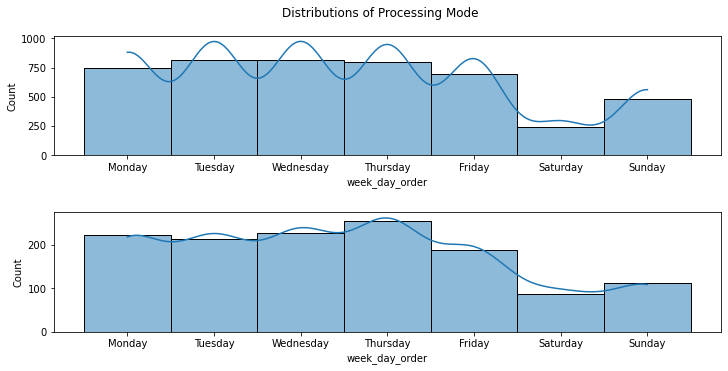

In [86]:
# Distribution of Processing
fig, ax = plt.subplots(2,1, figsize=(10,5))
fig.tight_layout(h_pad=4)

fig.suptitle('Distributions of Processing Mode')
plt.subplots_adjust(top=0.90)

bins = 60

sns.histplot(ax = ax[0], 
             data = df_standard,
             x = 'week_day_order', 
             bins = bins,
             kde = True)
sns.histplot(ax = ax[1], 
             data = df_express, 
             x = 'week_day_order', 
             bins = bins, 
             kde = True);


In [87]:
express_deli = df_express.groupby(['week_day_order'], as_index=False)['processing_mode'].count() \
    .rename(columns={"processing_mode":"express"}) \
        .sort_values("express",ascending=False) 

express_deli

,week_day_order,express
3,Thursday,255
2,Wednesday,227
0,Monday,222
1,Tuesday,214
4,Friday,189
6,Sunday,112
5,Saturday,86


In [88]:
order_per_WeekDay = df_date.groupby(['week_day_order'], as_index=False)['order_id'].count() \
    .rename(columns={"order_id":"total"}) \
        .sort_values("total",ascending=False )

order_per_WeekDay

,week_day_order,total
4,Thursday,1051
6,Wednesday,1044
5,Tuesday,1031
1,Monday,970
0,Friday,887
3,Sunday,593
2,Saturday,325


In [89]:
#To sort the weekdays according to the correct sequence
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=sorter, ordered=True)
df_date['week_day_order'] = df_date['week_day_order'].astype(cat_type)

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_18316/3904765641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['week_day_order'] = df_date['week_day_order'].astype(cat_type)


In [90]:
df_date.groupby('sub-category').mean()

,postal_code,quantity,sales,discount,profit,total_delivery_time,ready_to_ship,pick_up,on_truck
sub-category,,,,,,,,,
Gluten Free,57415.731020,3.819957,220.915588,0.075054,54.960185,-10.500000,-4.156250,-5.875000,-5.971800
Hunger Buster,52521.117647,3.428571,254.848622,0.072269,-13.901485,-11.857143,-4.400000,-6.200000,-6.218487
Low Sugar,57354.953846,3.846154,1530.024015,0.307692,0.586191,-11.875000,-3.428571,-4.571429,-5.553846
Maple Sweetened,55954.674797,4.365854,14.778276,0.071545,4.870100,-9.923077,-3.400000,-5.000000,-6.528455
Mega Protein,55794.046595,3.763441,247.230276,0.162724,47.192150,-11.093750,-4.250000,-6.250000,-6.275986
No Taste All Power,53291.909953,3.843602,31.698844,0.066351,13.920480,-10.652174,-4.166667,-5.916667,-6.251185
Nuts and more,56401.261501,3.723971,58.558804,0.076029,25.567311,-10.303922,-4.051724,-5.655172,-5.983051
Only Oats,53809.684615,3.675000,354.511004,0.160385,42.930826,-10.867925,-3.694444,-5.361111,-6.098077
Organic,57712.263158,3.736842,2960.494684,0.163158,1125.646916,-10.375000,-3.666667,-5.333333,-5.342105


In [91]:
df_date.groupby('region').mean()

,postal_code,quantity,sales,discount,profit,total_delivery_time,ready_to_ship,pick_up,on_truck
region,,,,,,,,,
Central,65139.784938,3.793628,213.271183,0.231962,19.876906,-10.202312,-4.204082,-5.510204,-6.246198
East,17825.354475,3.704801,233.413590,0.145525,31.637319,-10.706806,-4.411215,-6.074766,-6.125074
South,34684.545650,3.790548,232.562923,0.153759,28.519566,-11.516854,-4.463415,-6.475610,-6.058002
West,91985.827550,3.838065,230.107612,0.110279,35.689745,-11.334884,-3.725191,-5.374046,-6.053102


In [92]:
df

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,week_day_order
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,Wednesday
1,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,Monday
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,Thursday
3,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,Monday
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,Thursday
9990,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,Thursday
9991,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,Wednesday
9992,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310,Friday


In [93]:
df_kpi = df

In [94]:
df_kpi.drop(["ship_mode","customer_id","customer_name","origin_channel","city","state","postal_code","region", "category","sub-category","product_id","quantity","discount"],axis=1,inplace=True)

In [95]:
df_kpi

,order_id,order_date,sales,profit,week_day_order
0,CA-2019-121755,2019-01-16,90.570,11.7741,Wednesday
1,CA-2019-118255,2019-03-11,45.980,19.7714,Monday
2,CA-2019-169194,2019-06-20,45.000,4.9500,Thursday
3,CA-2019-111682,2019-06-17,30.000,3.3000,Monday
4,CA-2018-135545,2018-11-24,13.980,6.1512,Saturday
...,...,...,...,...,...
9989,US-2019-115441,2019-07-25,403.560,96.8544,Thursday
9990,US-2018-129007,2018-09-13,717.720,71.7720,Thursday
9991,CA-2018-132388,2018-10-10,362.136,-54.3204,Wednesday
9992,CA-2019-149272,2019-03-15,528.430,-143.4310,Friday


In [96]:
df_kpi['year'] = df_kpi['order_date'].dt.year

In [97]:
df_kpi['quarter'] = df_kpi['order_date'].dt.quarter

In [98]:
df_kpi

,order_id,order_date,sales,profit,week_day_order,year,quarter
0,CA-2019-121755,2019-01-16,90.570,11.7741,Wednesday,2019,1
1,CA-2019-118255,2019-03-11,45.980,19.7714,Monday,2019,1
2,CA-2019-169194,2019-06-20,45.000,4.9500,Thursday,2019,2
3,CA-2019-111682,2019-06-17,30.000,3.3000,Monday,2019,2
4,CA-2018-135545,2018-11-24,13.980,6.1512,Saturday,2018,4
...,...,...,...,...,...,...,...
9989,US-2019-115441,2019-07-25,403.560,96.8544,Thursday,2019,3
9990,US-2018-129007,2018-09-13,717.720,71.7720,Thursday,2018,3
9991,CA-2018-132388,2018-10-10,362.136,-54.3204,Wednesday,2018,4
9992,CA-2019-149272,2019-03-15,528.430,-143.4310,Friday,2019,1


In [99]:
df_kpi

,order_id,order_date,sales,profit,week_day_order,year,quarter
0,CA-2019-121755,2019-01-16,90.570,11.7741,Wednesday,2019,1
1,CA-2019-118255,2019-03-11,45.980,19.7714,Monday,2019,1
2,CA-2019-169194,2019-06-20,45.000,4.9500,Thursday,2019,2
3,CA-2019-111682,2019-06-17,30.000,3.3000,Monday,2019,2
4,CA-2018-135545,2018-11-24,13.980,6.1512,Saturday,2018,4
...,...,...,...,...,...,...,...
9989,US-2019-115441,2019-07-25,403.560,96.8544,Thursday,2019,3
9990,US-2018-129007,2018-09-13,717.720,71.7720,Thursday,2018,3
9991,CA-2018-132388,2018-10-10,362.136,-54.3204,Wednesday,2018,4
9992,CA-2019-149272,2019-03-15,528.430,-143.4310,Friday,2019,1


In [100]:
df_kpi.set_index('order_date', inplace=True)

In [101]:
df_kpi['sales'] = df_kpi['sales'].astype('float')

In [102]:
df_kpi['year'] = pd.to_datetime(df['year'])

In [103]:
df_date['arrival_scan_date'].nunique()

104

In [104]:
df_date

,order_id,order_date,week_day_order,ready_to_ship_date,week_day_ship_date,on_truck_scan_date,week_day_on_truck,arrival_scan_date,week_day_arrival,processing_mode,...,sub-category,product_id,quantity,sales,discount,profit,total_delivery_time,ready_to_ship,pick_up,on_truck
0,CA-2019-125206,2019-01-03,Thursday,NaT,NaN,2019-01-07,Monday,NaT,NaN,Express,...,Steel Cut,OFF-ST-10003692,2,114.460,0.0,28.6150,NaN,NaN,NaN,-4
1,CA-2019-160304,2019-01-02,Wednesday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,Only Oats,TEC-PH-10000455,2,231.980,0.0,67.2742,NaN,NaN,NaN,-7
2,CA-2019-160304,2019-01-02,Wednesday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,With Fruit,FUR-BO-10004709,3,173.940,0.0,38.2668,NaN,NaN,NaN,-7
3,US-2019-116365,2019-01-03,Thursday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,Gluten Free,TEC-AC-10002217,2,30.080,0.2,-5.2640,NaN,NaN,NaN,-6
4,US-2019-116365,2019-01-03,Thursday,NaT,NaN,2019-01-09,Wednesday,NaT,NaN,Standard Processing,...,Gluten Free,TEC-AC-10002942,3,165.600,0.2,-6.2100,NaN,NaN,NaN,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,Super Fibre Boost,OFF-BI-10003684,3,52.776,0.2,19.7910,NaN,NaN,NaN,-7
5897,CA-2020-143259,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,With Fruit,FUR-BO-10003441,4,323.136,0.2,12.1176,NaN,NaN,NaN,-7
5898,CA-2020-115427,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,Super Fibre Boost,OFF-BI-10002103,2,13.904,0.2,4.5188,NaN,NaN,NaN,-7
5899,CA-2020-115427,2020-12-30,Wednesday,NaT,NaN,2021-01-06,Wednesday,NaT,NaN,Standard Processing,...,Super Fibre Boost,OFF-BI-10004632,2,20.720,0.2,6.4750,NaN,NaN,NaN,-7


In [105]:
df_date_wo_n = df_date[~np.isnan(df_date['arrival_scan_date'])]

In [106]:
df_date_wo_n.drop_duplicates(subset=None, keep='first' ,inplace=True, ignore_index=False)

/opt/anaconda3/envs/muelsi/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [107]:
df_date_wo_n

,order_id,order_date,week_day_order,ready_to_ship_date,week_day_ship_date,on_truck_scan_date,week_day_on_truck,arrival_scan_date,week_day_arrival,processing_mode,...,sub-category,product_id,quantity,sales,discount,profit,total_delivery_time,ready_to_ship,pick_up,on_truck
463,CA-2019-138933,2019-04-24,Wednesday,NaT,NaN,2019-04-29,Monday,2019-05-03,Friday,Express,...,Super Fibre Boost,OFF-BI-10003355,1,3.984,0.2,1.3944,-9.0,NaN,NaN,-5
465,CA-2019-109666,2019-04-19,Friday,NaT,NaN,2019-04-29,Monday,2019-05-03,Friday,Standard Processing,...,Hunger Buster,OFF-SU-10002522,2,7.760,0.0,2.2504,-14.0,NaN,NaN,-10
466,CA-2019-109666,2019-04-19,Friday,NaT,NaN,2019-04-29,Monday,2019-05-03,Friday,Standard Processing,...,Hunger Buster,OFF-SU-10001218,5,54.900,0.0,15.3720,-14.0,NaN,NaN,-10
467,CA-2019-109666,2019-04-19,Friday,NaT,NaN,2019-04-29,Monday,2019-05-03,Friday,Standard Processing,...,Only Oats,TEC-PH-10004774,2,25.980,0.0,0.7794,-14.0,NaN,NaN,-10
468,CA-2019-109666,2019-04-19,Friday,NaT,NaN,2019-04-29,Monday,2019-05-03,Friday,Standard Processing,...,Steel Cut,OFF-ST-10000991,4,459.880,0.0,13.7964,-14.0,NaN,NaN,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,US-2020-104451,2020-05-08,Friday,NaT,NaN,2020-05-13,Wednesday,2020-05-15,Friday,Standard Processing,...,Mega Protein,OFF-AP-10000692,4,81.080,0.0,22.7024,-7.0,NaN,NaN,-5
3353,CA-2020-141733,2020-05-07,Thursday,NaT,NaN,2020-05-13,Wednesday,2020-05-15,Friday,Standard Processing,...,Mega Protein,OFF-AP-10001563,2,87.444,0.1,18.4604,-8.0,NaN,NaN,-6
3354,CA-2020-141733,2020-05-07,Thursday,NaT,NaN,2020-05-13,Wednesday,2020-05-15,Friday,Standard Processing,...,With Nuts,FUR-CH-10004086,5,1458.650,0.0,423.0085,-8.0,NaN,NaN,-6
3355,CA-2020-141733,2020-05-07,Thursday,NaT,NaN,2020-05-13,Wednesday,2020-05-15,Friday,Standard Processing,...,With Nuts,FUR-CH-10002017,1,26.640,0.0,7.4592,-8.0,NaN,NaN,-6
